In [17]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import json
import glob


JOBCENTRIC = False # True

# load demand data
# DATA_NAME = 'ndf50_mldat6e8_university'
# DATA_NAME = 'social_media_cloud_k_4_L_2_n_4_chancap500_numchans1_mldat2e6_bidirectional'
# DATA_NAME = 'pulse_university_mldatNone'
DATA_NAME = 'university_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional'
# DATA_NAME = 'jobcentric_prototyping_k_4_L_2_n_16_chancap1_numchans1_mldatNone_bidirectional'




# path_to_benchmark_data = '/scratch/datasets/trafpy/traces/flowcentric/{}_benchmark_data_v3'.format(DATA_NAME)
if JOBCENTRIC:
    path_to_benchmark_data = '/rdata/ong/trafpy/traces/jobcentric/{}_benchmark_data'.format(DATA_NAME)
else:
    path_to_benchmark_data = '/rdata/ong/trafpy/traces/flowcentric/{}_benchmark_data'.format(DATA_NAME)
# path_to_benchmark_data = os.getcwd()+'/../scripts/data2/'


if os.path.isdir(path_to_benchmark_data):
    # data split into separate files in a directory
    separate_files = True
    # load paths to raw benchmark data
    if glob.glob(path_to_benchmark_data + '/*.json'):
        # saved demand_data in json format
        demand_data_list = sorted(glob.glob(path_to_benchmark_data + '/*.json'))
    elif glob.glob(path_to_benchmark_data + '/*.pickle'):
        # saved demand_data in pickle format
        demand_data_list = sorted(glob.glob(path_to_benchmark_data + '/*.pickle'))
    else:
        raise Exception('No valid demand_data save format found in {}.'.format(path_to_benchmark_data))
    print(demand_data_list)
    
else:
    # all data stored in single file
    separate_files = False
    # load raw benchmark data
    benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))

# path_to_benchmark_data = '/scratch/datasets/trafpy/traces/flowcentric/{}_benchmark_data.pickle'.format(DATA_NAME)
# benchmark_data = tpg.unpickle_data(path_to_benchmark_data)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/rdata/ong/trafpy/traces/flowcentric/university_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_benchmark_data/benchmark_university_load_0.1_repeat_0.pickle', '/rdata/ong/trafpy/traces/flowcentric/university_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_benchmark_data/benchmark_university_load_0.2_repeat_0.pickle', '/rdata/ong/trafpy/traces/flowcentric/university_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_benchmark_data/benchmark_university_load_0.3_repeat_0.pickle', '/rdata/ong/trafpy/traces/flowcentric/university_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_benchmark_data/benchmark_university_load_0.4_repeat_0.pickle', '/rdata/ong/trafpy/traces/flowcentric/university_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_benchmark_data/benchmark_university_load_0.5_repeat_0.pickle', '/rdata/ong/trafpy/traces/flowcentric/university_k_

In [18]:
%autoreload
import glob

if not separate_files:
    # organise into list of demand_data dicts
    benchmarks = list(benchmark_data.keys())
    demand_data_list = []
    loads = []
    for benchmark in benchmarks:
        for load in benchmark_data[benchmark]:
            for repeat in benchmark_data[benchmark][load]:
                demand_data = benchmark_data[benchmark][load][repeat]
                demand_data_list.append(demand_data)
                loads.append(load)
    num_sets_of_demand_data = len(demand_data_list)
    print('Number of sets of demand data: {}'.format(num_sets_of_demand_data))
else:
    # stored as separate files, already loaded into list of paths to these files
    pass

In [19]:
# COMPUTE METRICS (NO PLOTTING -> FASTER)

%autoreload
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0}) # disable warnings
from trafpy.generator import Demand, DemandsAnalyser, DemandPlotter, DemandsPlotter

# for plotting
net = tpg.gen_fat_tree(k=4, 
                       L=2, 
                       n=16, 
                       num_channels=1, 
                       server_to_rack_channel_capacity=1250, 
                       rack_to_edge_channel_capacity=1000, 
                       edge_to_agg_channel_capacity=1000, 
                       agg_to_core_channel_capacity=2000, 
                       bidirectional_links=True)
print('max nw capacity: {}'.format(net.graph['max_nw_capacity']))
# net = tpg.gen_arbitrary_network(ep_label=None, num_eps=64, num_channels=1, server_to_rack_channel_capacity=50000, bidirectional_links=True)
slot_size = 1e6

# create demand objects and print analysis summary
if not separate_files:
    demands = []
    for demand_data, load in zip(demand_data_list, loads):
        demand = Demand(demand_data, net.graph['endpoints'])
        demands.append(demand)
    analyser = DemandsAnalyser(*demands, jobcentric=JOBCENTRIC)
else:
    analyser = DemandsAnalyser(*demand_data_list, net=net.graph['endpoints'], jobcentric=JOBCENTRIC)
analyser.compute_metrics(print_summary=True)

max nw capacity: 40000.0


Name   Flows  1st           Last       Duration          Info     Load  \
0  demand  135916  0.0  788907.126500  788907.126500  3.155629e+09   4000.0   
1  demand  135916  0.0  387186.376250  387186.376250  3.097491e+09   8000.0   
2  demand  271832  0.0  530558.560833  530558.560833  6.366703e+09  12000.0   
3  demand  271832  0.0  400432.529125  400432.529125  6.406920e+09  16000.0   
4  demand  543664  0.0  636231.307600  636231.307600  1.272463e+10  20000.0   
5  demand  543664  0.0  526288.592833  526288.592833  1.263093e+10  24000.0   
6  demand  543664  0.0  430111.575857  430111.575857  1.204312e+10  28000.0   
7  demand  543664  0.0  385020.655375  385020.655375  1.232066e+10  32000.0   
8  demand  543664  0.0  345611.044667  345611.044667  1.244200e+10  36000.0   

   Smallest     Largest  
0       1.0  17236750.0  
1       1.0  19829525.0  
2       1.0  19829525.0  
3       1.0  19829525.0  
4       1.0  19829525.0  
5       1.0  18881650.0  
6       1.0  11437125.0  
7       1.0  17236750.0  
8       1.0  18881650.0

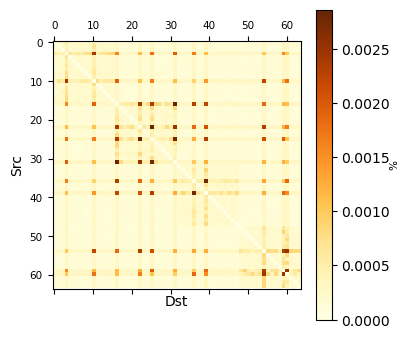

<Figure size 640x480 with 0 Axes>

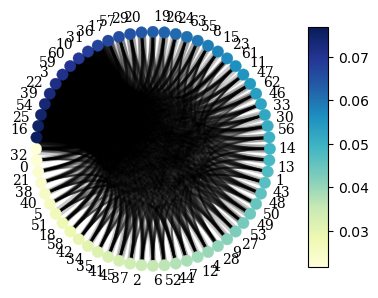

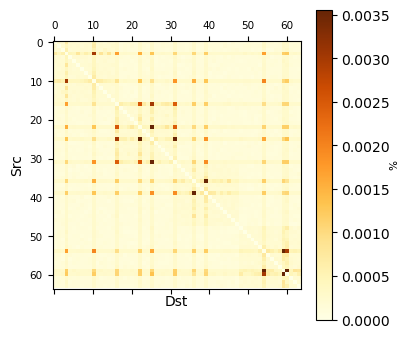

<Figure size 640x480 with 0 Axes>

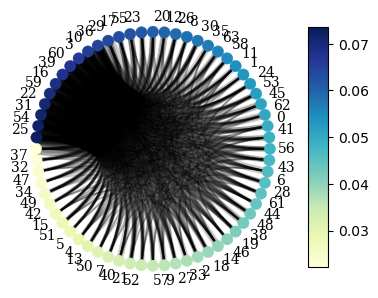

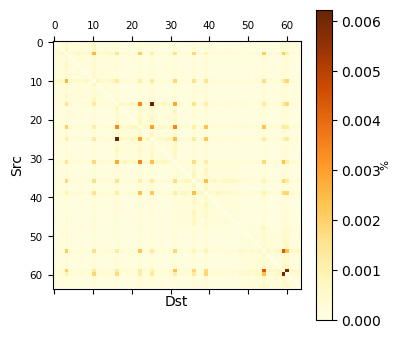

<Figure size 640x480 with 0 Axes>

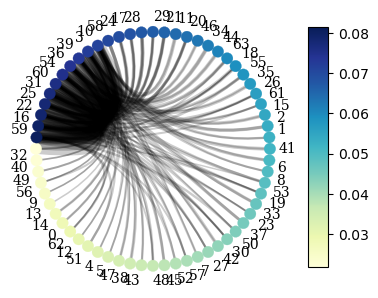

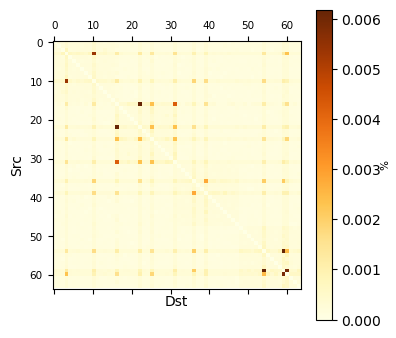

<Figure size 640x480 with 0 Axes>

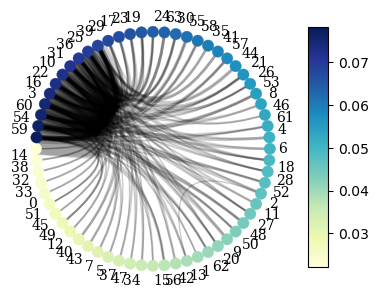

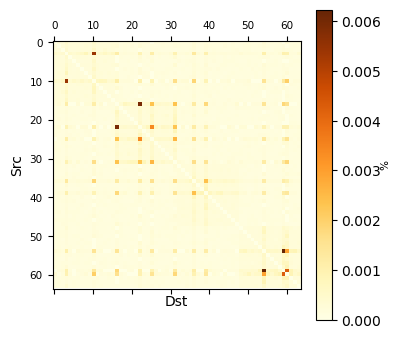

<Figure size 640x480 with 0 Axes>

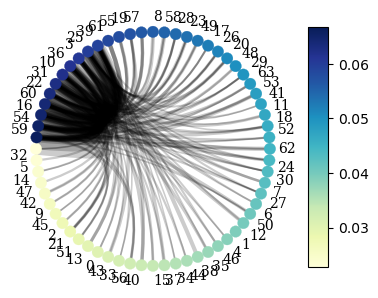

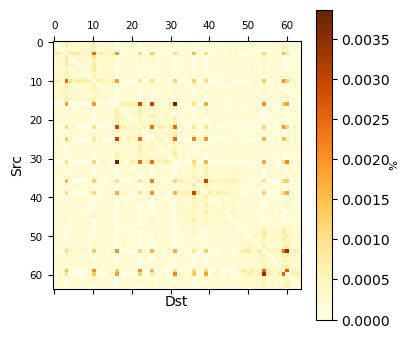

<Figure size 640x480 with 0 Axes>

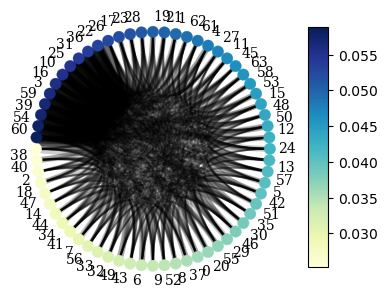

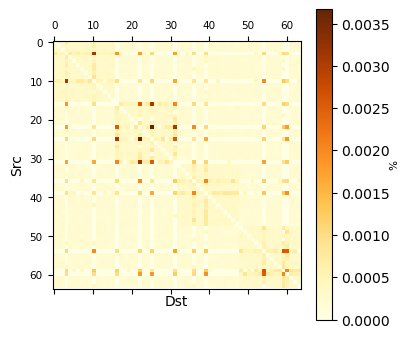

<Figure size 640x480 with 0 Axes>

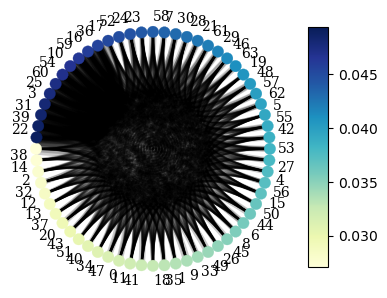

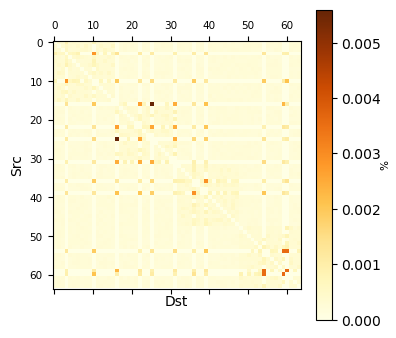

<Figure size 640x480 with 0 Axes>

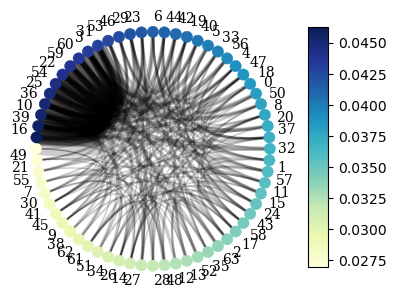

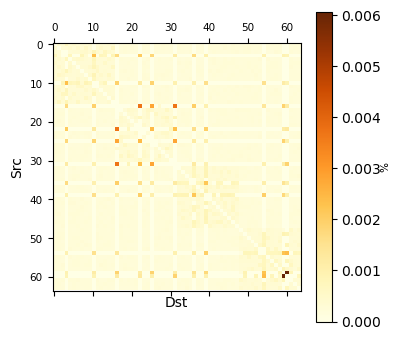

<Figure size 640x480 with 0 Axes>

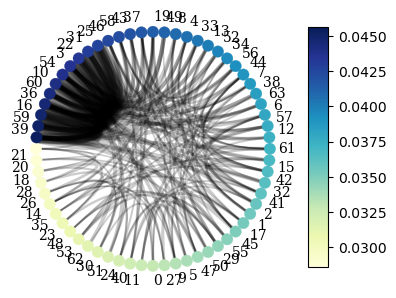

In [20]:
%autoreload
from trafpy.generator import Demand, DemandsAnalyser, DemandPlotter, DemandsPlotter

for demand_data in demand_data_list:
    demand = Demand(demand_data, net.graph['endpoints'])
    plotter = DemandPlotter(demand)
    plotter.plot_node_dist(eps=net.graph['endpoints'],
                           chord_edge_width_range=[1,25],
                           chord_edge_display_threshold=0.06)
#     plotter.plot_node_load_dists(eps=net.graph['endpoints'], ep_link_bandwidth=net.graph['ep_link_capacity'])
#     raise Exception()

Characteristics of Flow Size distribution: DescribeResult(nobs=135916, minmax=(1.0, 17236750.0), mean=23217.49099443774, variance=38655810654.32814, skewness=30.790957161089498, kurtosis=1396.470462319782)


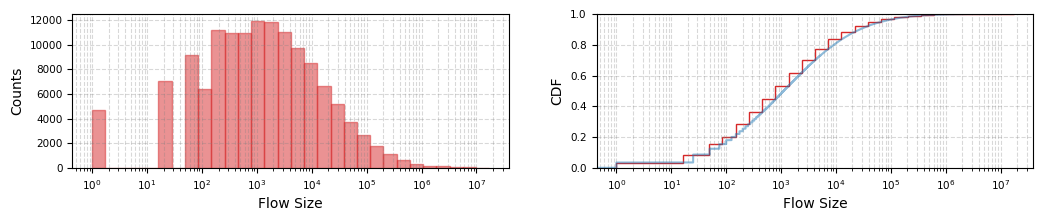

Characteristics of Interarrival Time distribution: DescribeResult(nobs=135915, minmax=(0.0009198953630402684, 96.26705037540523), mean=5.804415454511852, variance=41.928369521168875, skewness=2.3907403280229853, kurtosis=9.38330642233299)


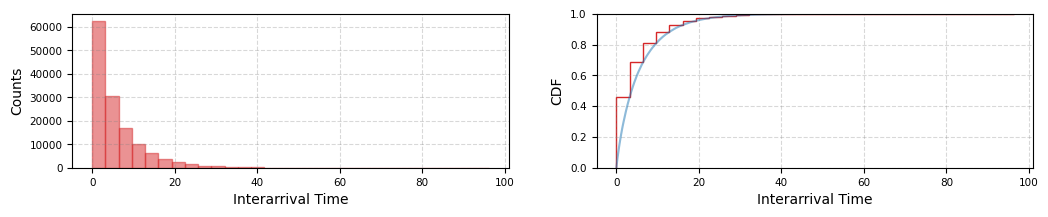

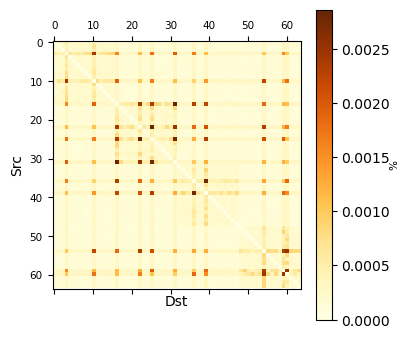

<Figure size 640x480 with 0 Axes>

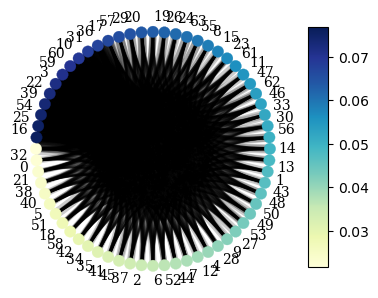

<Figure size 640x480 with 0 Axes>

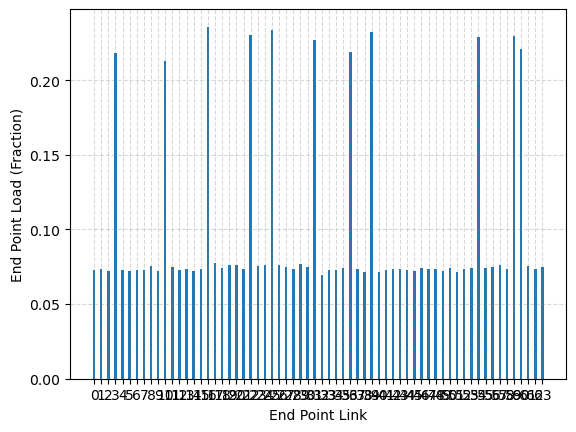

<Figure size 640x480 with 0 Axes>

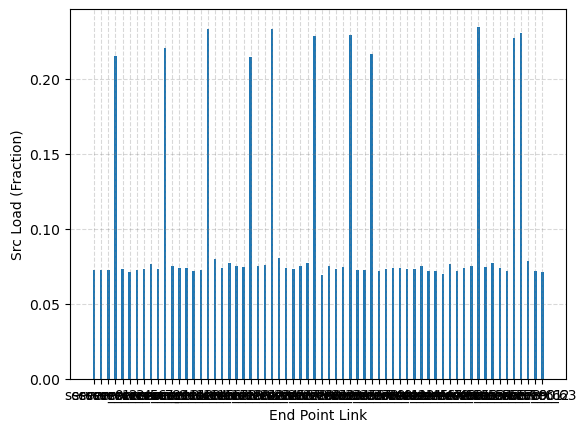

<Figure size 640x480 with 0 Axes>

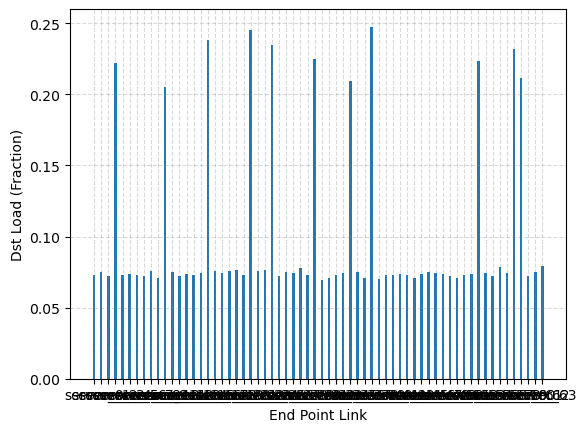

Characteristics of Flow Size distribution: DescribeResult(nobs=135916, minmax=(1.0, 19829525.0), mean=22789.745210276935, variance=40023630972.82778, skewness=38.48728358124163, kurtosis=2344.477469582166)


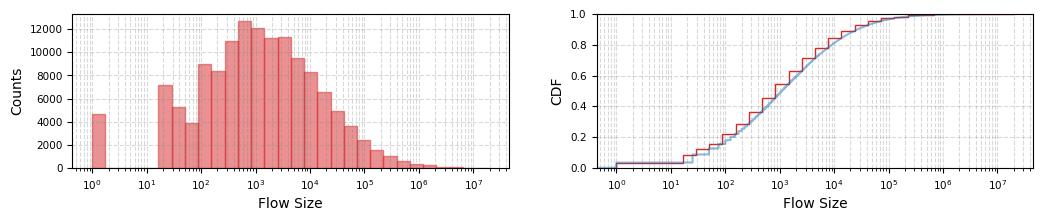

Characteristics of Interarrival Time distribution: DescribeResult(nobs=135915, minmax=(0.000451223342679441, 47.22052282979712), mean=2.848739110841292, variance=10.143571354110671, skewness=2.369507022109074, kurtosis=8.908554106203168)


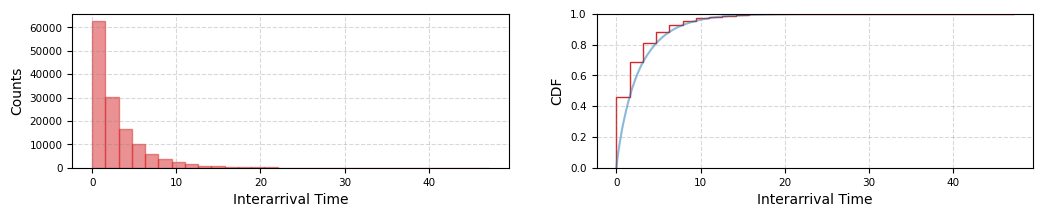

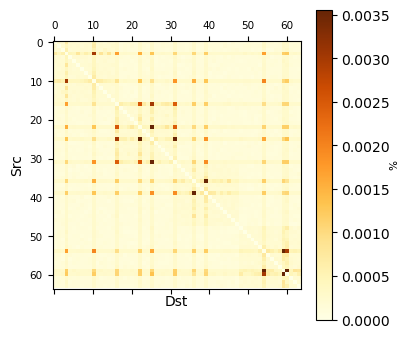

<Figure size 640x480 with 0 Axes>

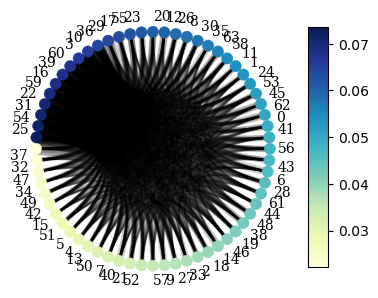

<Figure size 640x480 with 0 Axes>

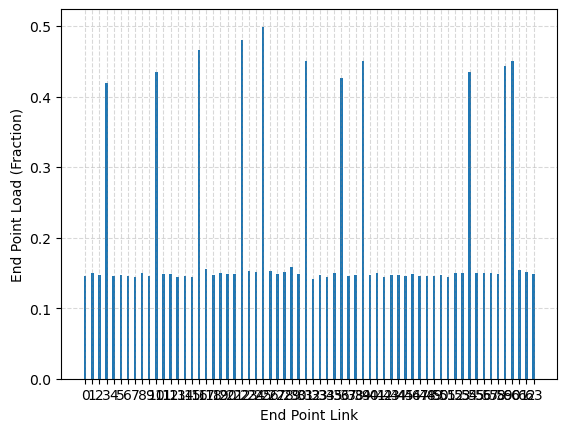

<Figure size 640x480 with 0 Axes>

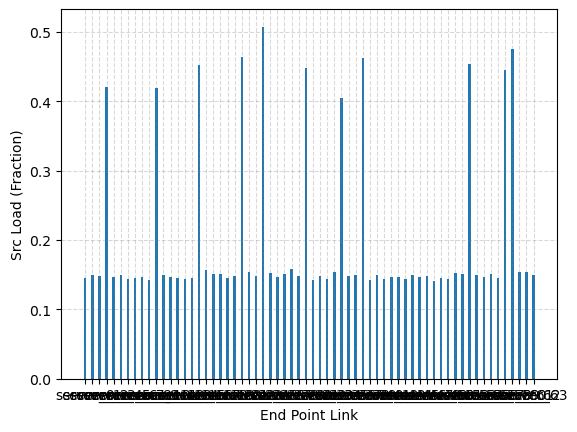

<Figure size 640x480 with 0 Axes>

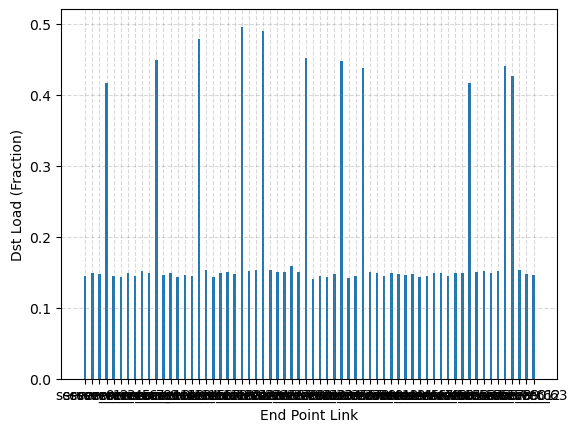

Characteristics of Flow Size distribution: DescribeResult(nobs=271832, minmax=(1.0, 19829525.0), mean=23421.461527708292, variance=46184904234.645355, skewness=39.47879023195274, kurtosis=2386.401224013649)


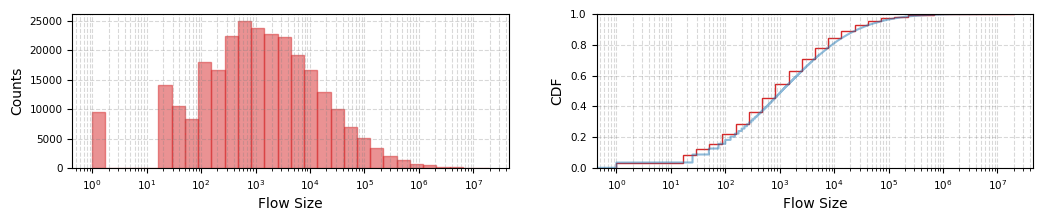

Characteristics of Interarrival Time distribution: DescribeResult(nobs=271831, minmax=(0.0, 32.0642651078233), mean=1.9517956407966355, variance=4.73711423296668, skewness=2.3427068784809566, kurtosis=8.681742516477582)


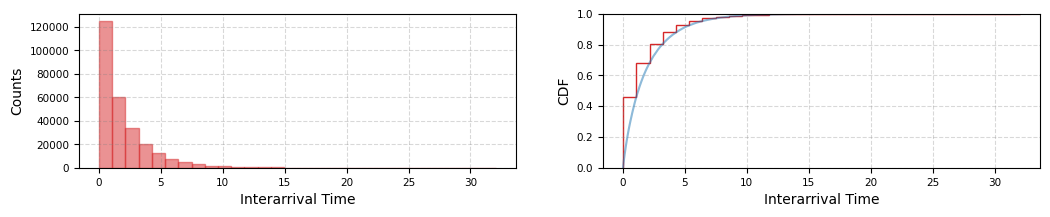

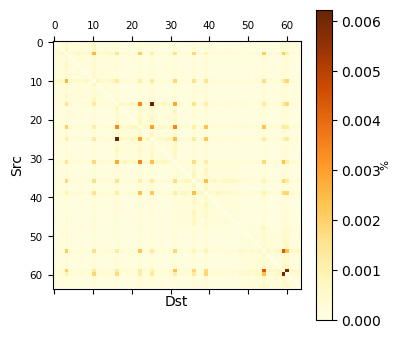

<Figure size 640x480 with 0 Axes>

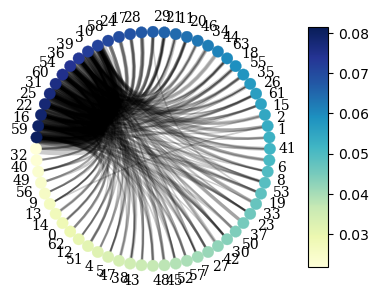

<Figure size 640x480 with 0 Axes>

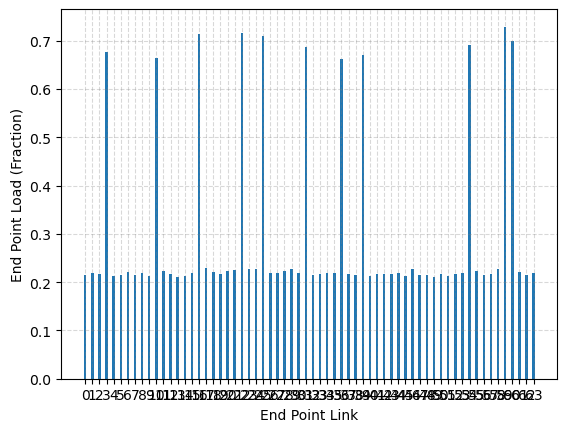

<Figure size 640x480 with 0 Axes>

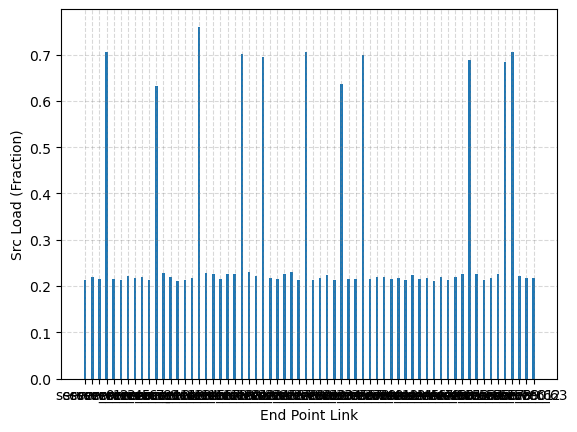

<Figure size 640x480 with 0 Axes>

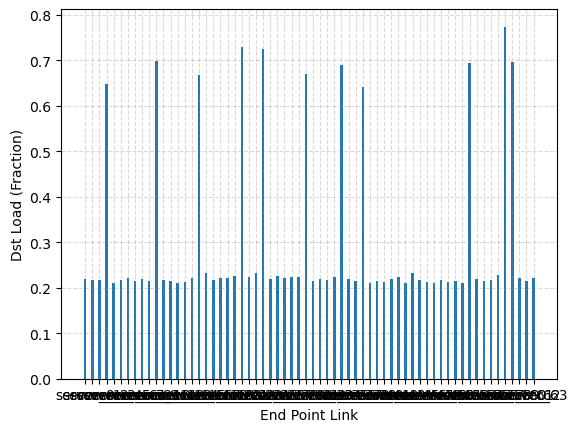

Characteristics of Flow Size distribution: DescribeResult(nobs=271832, minmax=(1.0, 19829525.0), mean=23569.4122325554, variance=45371701313.24652, skewness=45.22213826376073, kurtosis=3179.3334363422264)


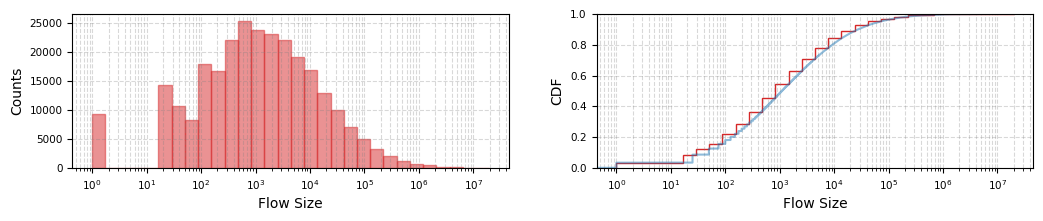

Characteristics of Interarrival Time distribution: DescribeResult(nobs=271831, minmax=(0.0, 24.44835308077745), mean=1.473093683667486, variance=2.7469925197233365, skewness=2.461309164239874, kurtosis=10.182554166794157)


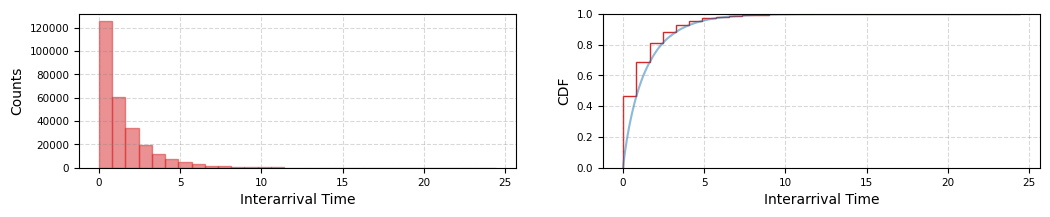

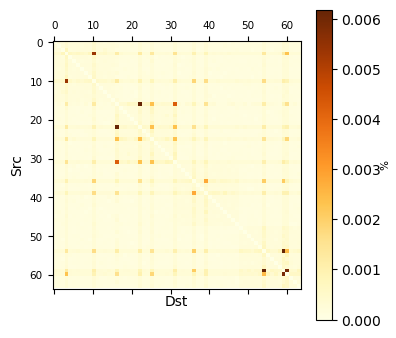

<Figure size 640x480 with 0 Axes>

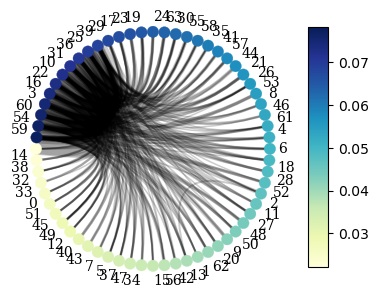

<Figure size 640x480 with 0 Axes>

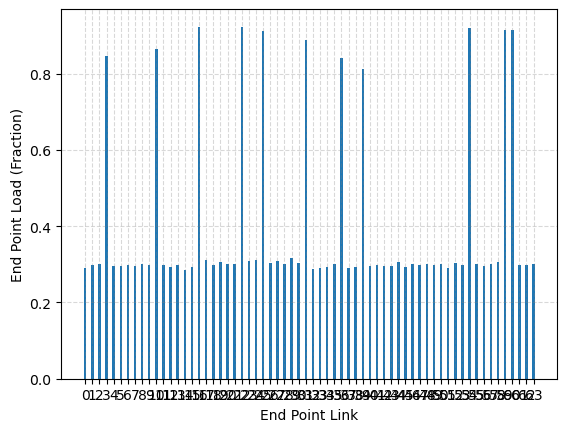

<Figure size 640x480 with 0 Axes>

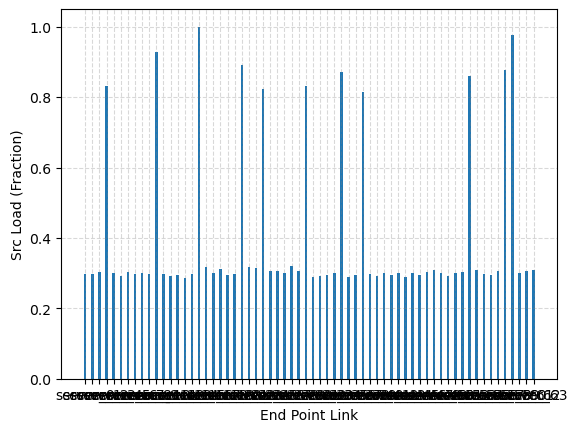

<Figure size 640x480 with 0 Axes>

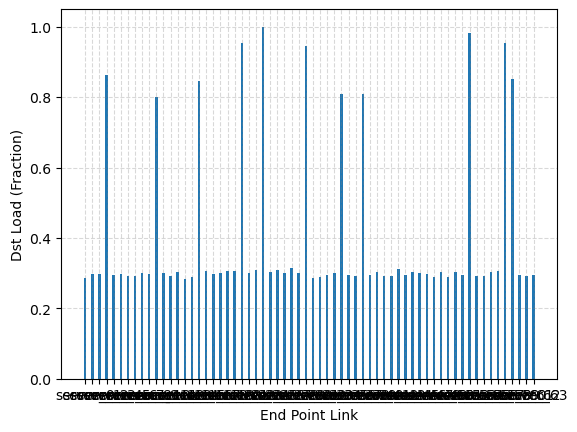

Characteristics of Flow Size distribution: DescribeResult(nobs=543664, minmax=(1.0, 19829525.0), mean=23405.313119868155, variance=40645593576.07071, skewness=38.75449133736111, kurtosis=2458.0506785534826)


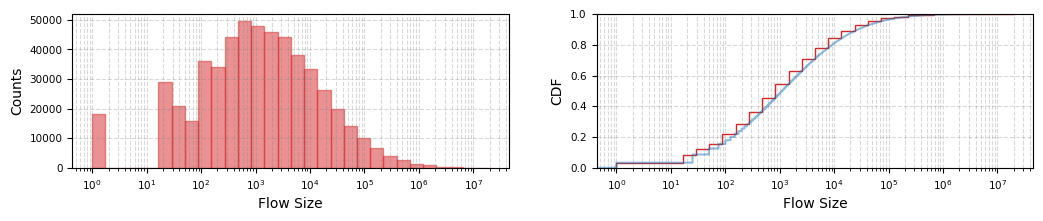

Characteristics of Interarrival Time distribution: DescribeResult(nobs=543663, minmax=(0.0, 23.265197817469016), mean=1.1702678085504996, variance=1.725724384134241, skewness=2.4689942944031316, kurtosis=10.23949396108613)


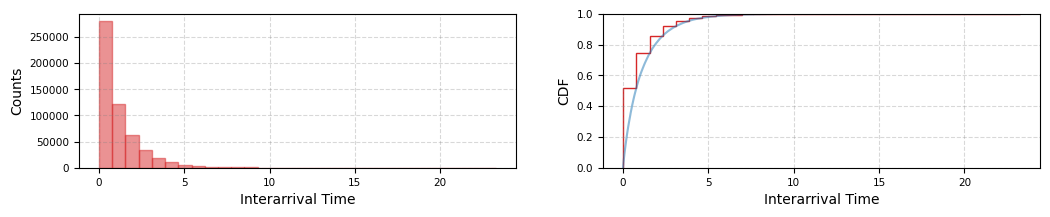

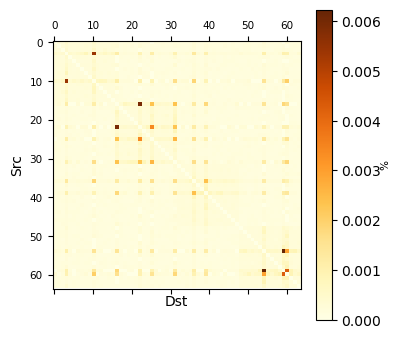

<Figure size 640x480 with 0 Axes>

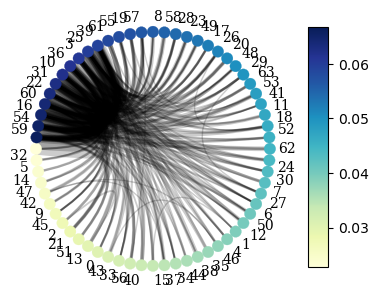

<Figure size 640x480 with 0 Axes>

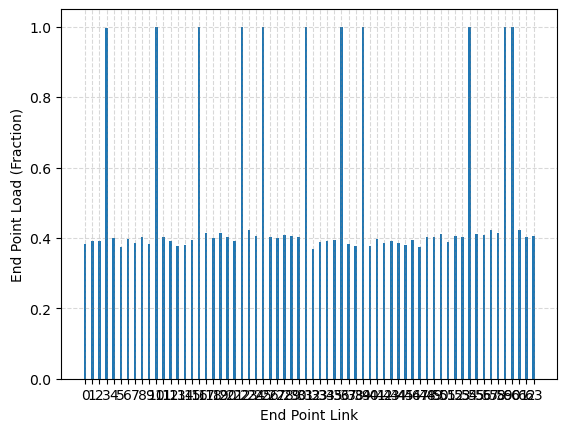

<Figure size 640x480 with 0 Axes>

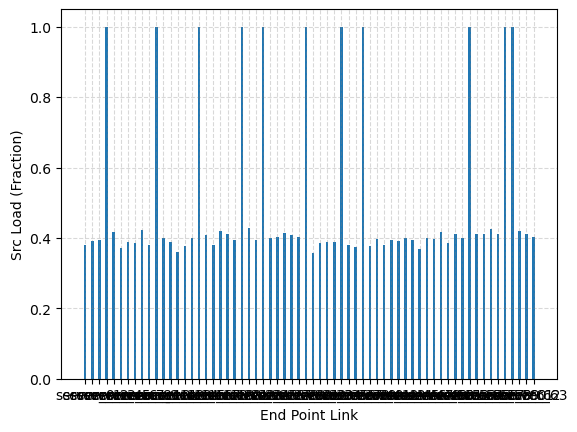

<Figure size 640x480 with 0 Axes>

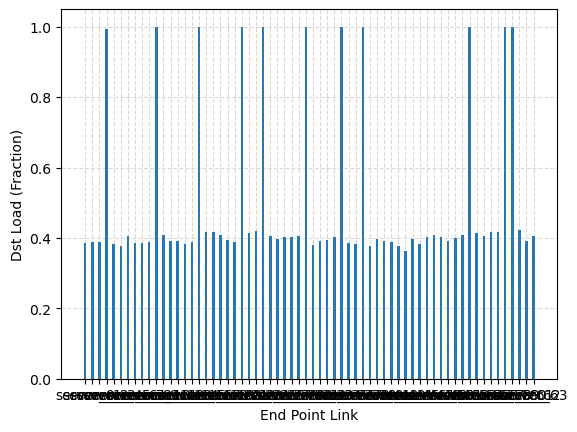

Characteristics of Flow Size distribution: DescribeResult(nobs=543664, minmax=(1.0, 18881650.0), mean=23232.9641616881, variance=39404352743.545494, skewness=35.3900975032793, kurtosis=1989.5287322884776)


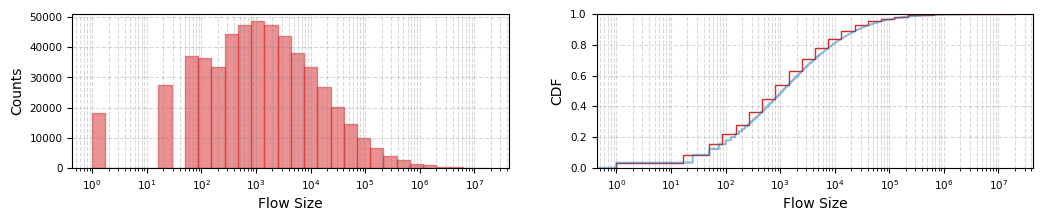

Characteristics of Interarrival Time distribution: DescribeResult(nobs=543663, minmax=(0.0, 19.284803265240043), mean=0.9680419539923134, variance=1.159567068497946, skewness=2.31491143542669, kurtosis=8.539586454105711)


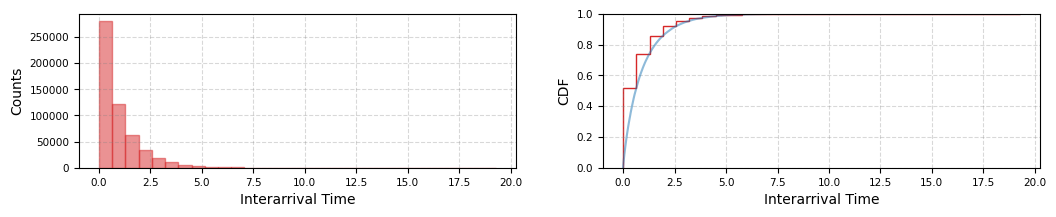

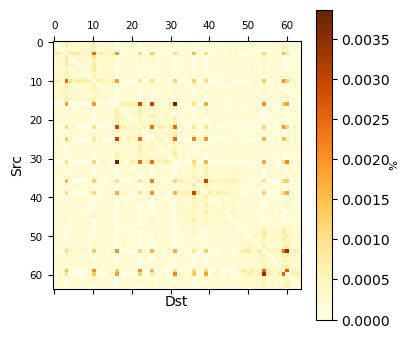

<Figure size 640x480 with 0 Axes>

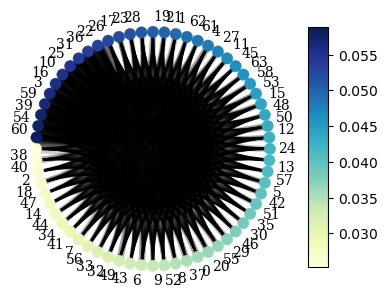

<Figure size 640x480 with 0 Axes>

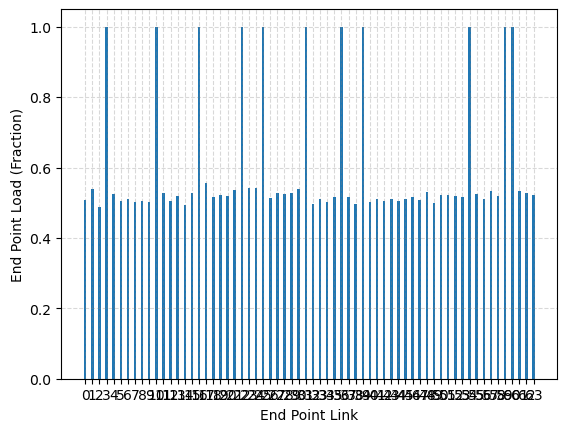

<Figure size 640x480 with 0 Axes>

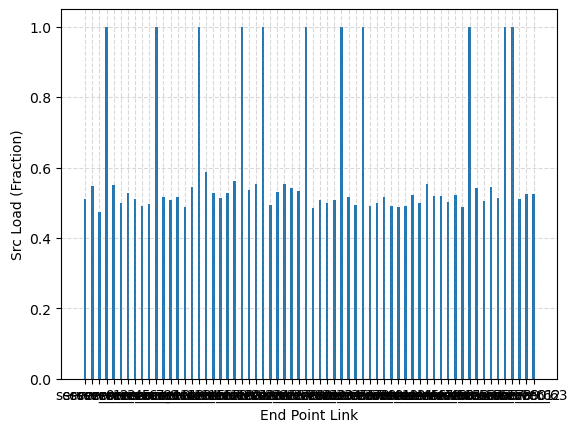

<Figure size 640x480 with 0 Axes>

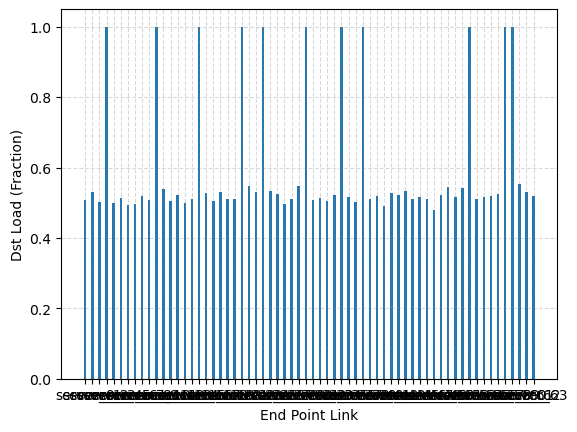

Characteristics of Flow Size distribution: DescribeResult(nobs=543664, minmax=(1.0, 11437125.0), mean=22151.77779658024, variance=30041580341.446533, skewness=27.991254366324736, kurtosis=1132.4762743763688)


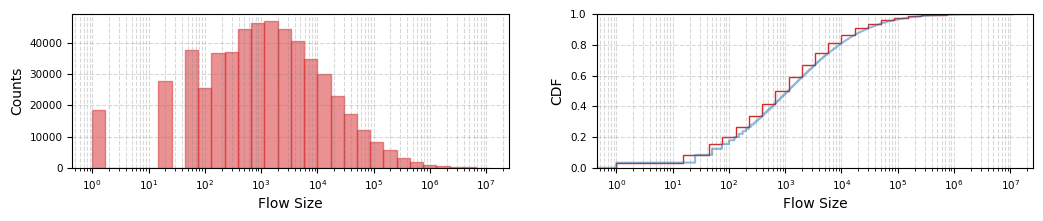

Characteristics of Interarrival Time distribution: DescribeResult(nobs=543663, minmax=(0.0, 15.75319835342816), mean=0.7911363765000198, variance=0.7805249121530965, skewness=2.384904572909839, kurtosis=9.351045646425922)


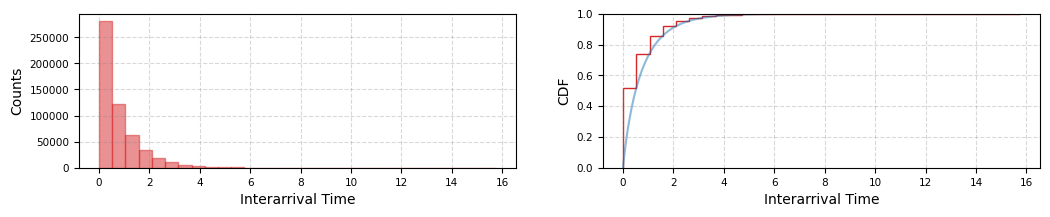

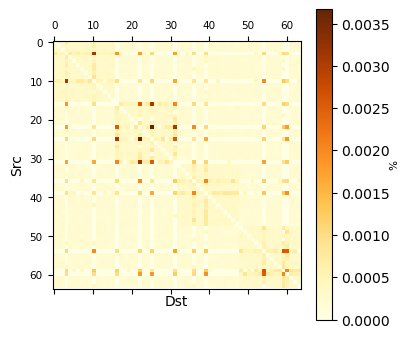

<Figure size 640x480 with 0 Axes>

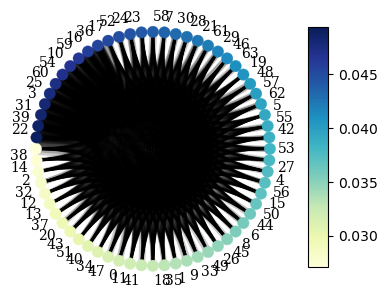

<Figure size 640x480 with 0 Axes>

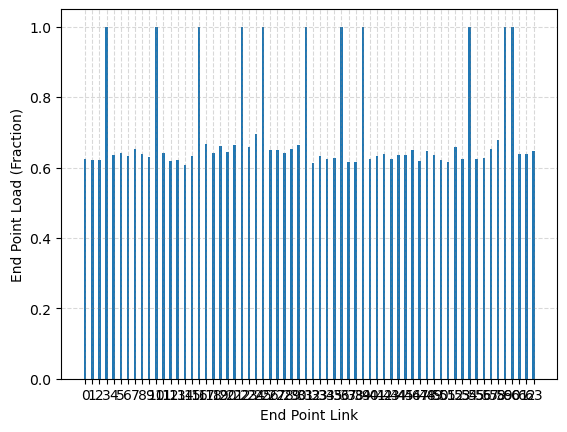

<Figure size 640x480 with 0 Axes>

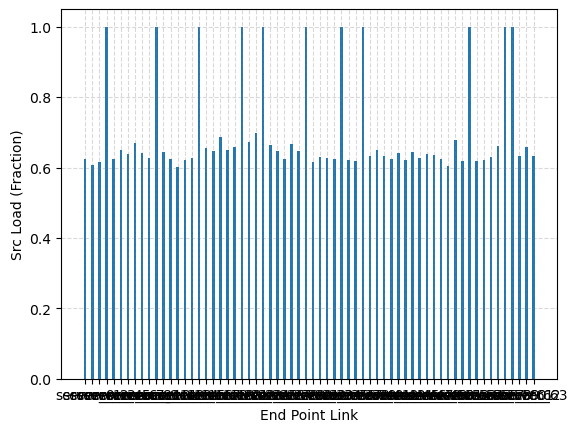

<Figure size 640x480 with 0 Axes>

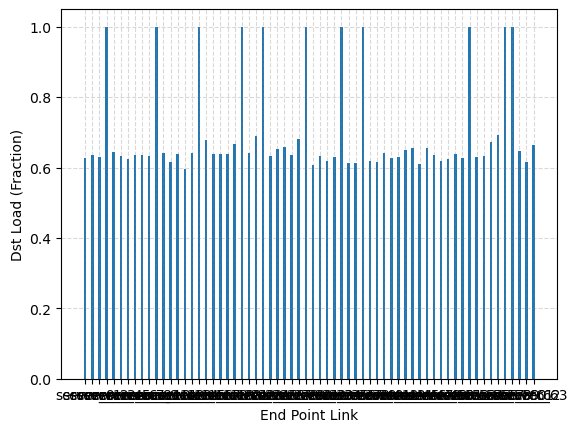

Characteristics of Flow Size distribution: DescribeResult(nobs=543664, minmax=(1.0, 17236750.0), mean=22662.271130698373, variance=36044359704.16287, skewness=33.362966347458766, kurtosis=1681.3296913344884)


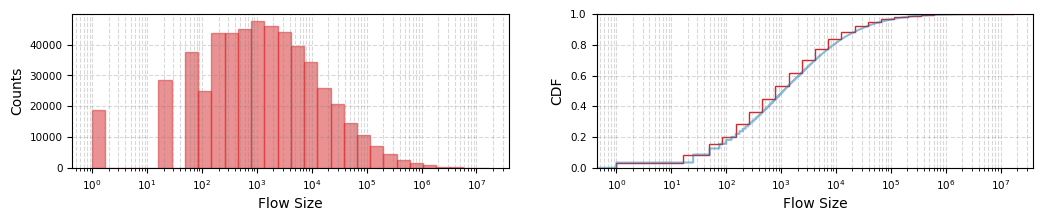

Characteristics of Interarrival Time distribution: DescribeResult(nobs=543663, minmax=(0.0, 14.026809495524503), mean=0.708197275472082, variance=0.6253699733349873, skewness=2.3895685466082224, kurtosis=9.500122122907387)


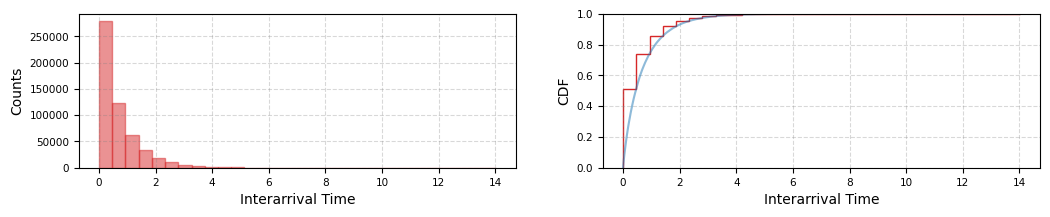

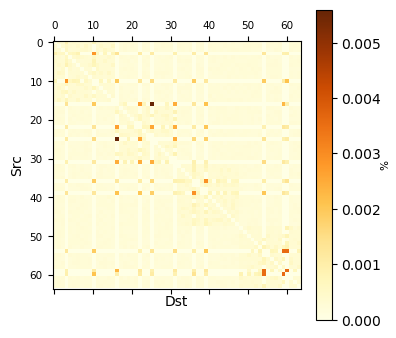

<Figure size 640x480 with 0 Axes>

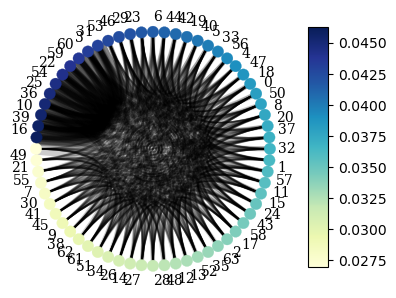

<Figure size 640x480 with 0 Axes>

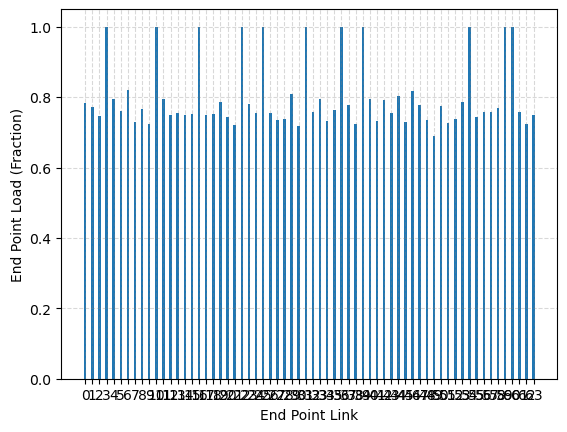

<Figure size 640x480 with 0 Axes>

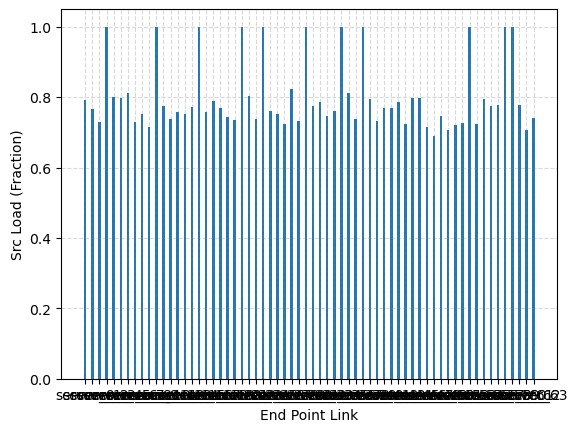

<Figure size 640x480 with 0 Axes>

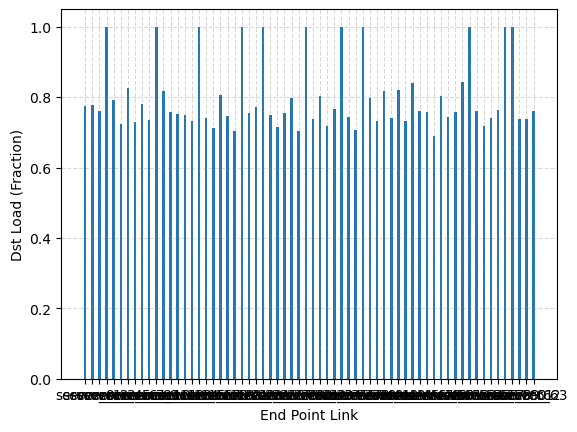

Characteristics of Flow Size distribution: DescribeResult(nobs=543664, minmax=(1.0, 18881650.0), mean=22885.454265870096, variance=37683051007.47092, skewness=39.847730563612785, kurtosis=2666.195630298156)


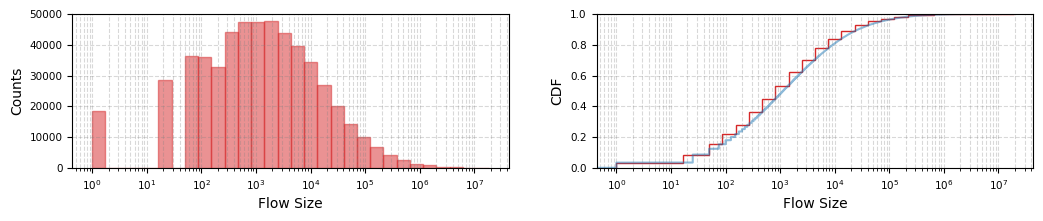

Characteristics of Interarrival Time distribution: DescribeResult(nobs=543663, minmax=(0.0, 12.63886179070687), mean=0.635708232244348, variance=0.5014459881343056, skewness=2.413873617232327, kurtosis=9.815532883352295)


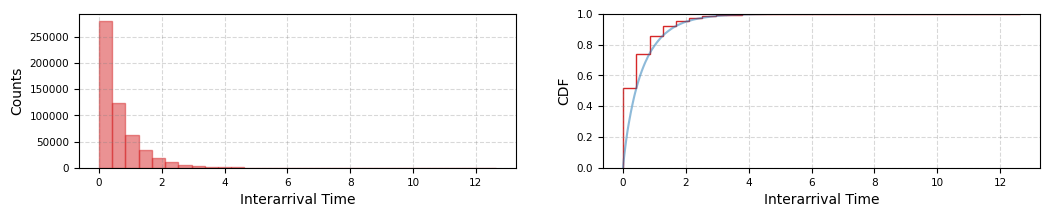

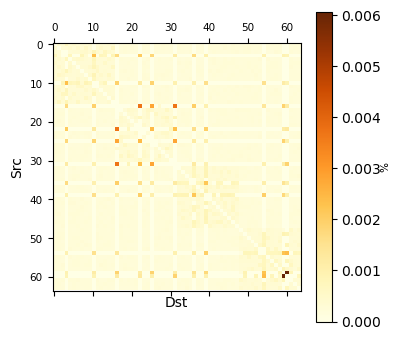

<Figure size 640x480 with 0 Axes>

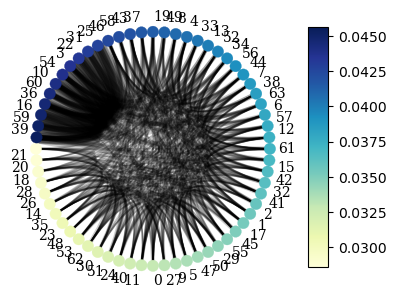

<Figure size 640x480 with 0 Axes>

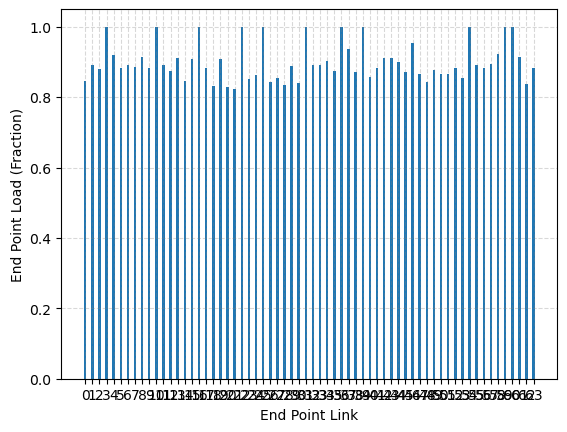

<Figure size 640x480 with 0 Axes>

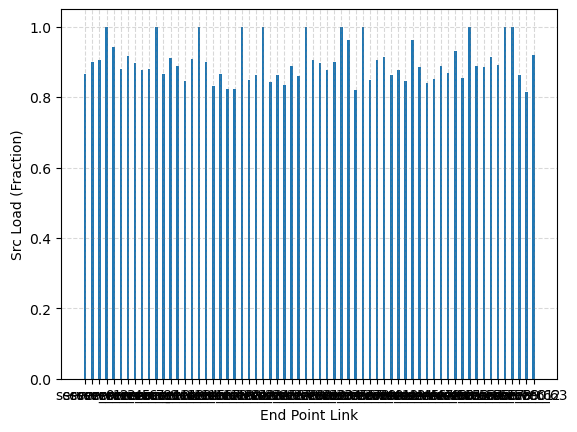

<Figure size 640x480 with 0 Axes>

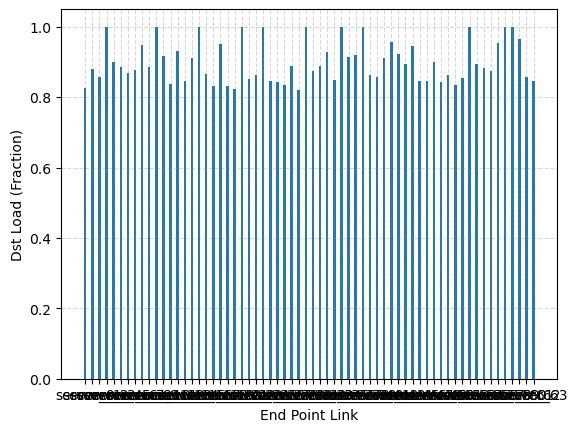

Name   Flows  1st           Last       Duration          Info     Load  \
0  demand  135916  0.0  788907.126500  788907.126500  3.155629e+09   4000.0   
1  demand  135916  0.0  387186.376250  387186.376250  3.097491e+09   8000.0   
2  demand  271832  0.0  530558.560833  530558.560833  6.366703e+09  12000.0   
3  demand  271832  0.0  400432.529125  400432.529125  6.406920e+09  16000.0   
4  demand  543664  0.0  636231.307600  636231.307600  1.272463e+10  20000.0   
5  demand  543664  0.0  526288.592833  526288.592833  1.263093e+10  24000.0   
6  demand  543664  0.0  430111.575857  430111.575857  1.204312e+10  28000.0   
7  demand  543664  0.0  385020.655375  385020.655375  1.232066e+10  32000.0   
8  demand  543664  0.0  345611.044667  345611.044667  1.244200e+10  36000.0   

   Smallest     Largest  
0       1.0  17236750.0  
1       1.0  19829525.0  
2       1.0  19829525.0  
3       1.0  19829525.0  
4       1.0  19829525.0  
5       1.0  18881650.0  
6       1.0  11437125.0  
7       1.0  17236750.0  
8       1.0  18881650.0

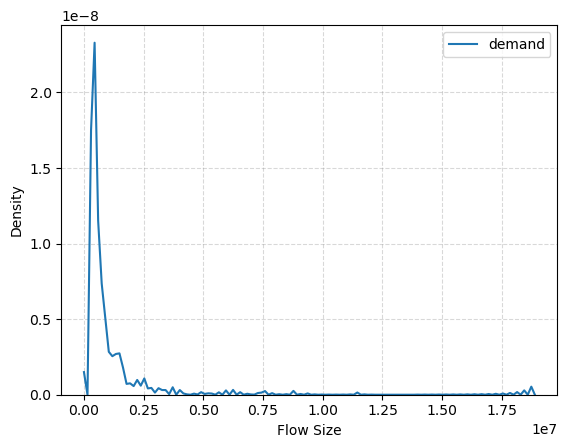

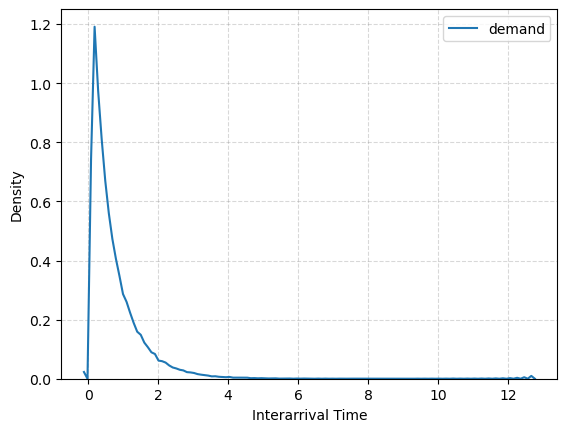

In [21]:
# COMPUTE METRICS AND PLOTTING

%autoreload
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0}) # disable warnings
from trafpy.generator import Demand, DemandsAnalyser, DemandPlotter, DemandsPlotter

# for plotting
# net = tpg.gen_fat_tree(k=6, L=2, n=10, num_channels=1, server_to_rack_channel_capacity=500, rack_to_edge_channel_capacity=1000, edge_to_agg_channel_capacity=1000, agg_to_core_channel_capacity=2000, bidirectional_links=True)
slot_size = 1e6

# create demand objects and print analysis summary
demands = []
for demand_data in demand_data_list:
    demand = Demand(demand_data, net.graph['endpoints'])
#     demand.name = 'load_{}'.format(load) # name for multi-plot legend(s)
    if not separate_files:
        demands.append(demand)
    plotter = DemandPlotter(demand)
    
    # flow-centric
    plotter.plot_flow_size_dist(logscale=True, num_bins=30)
    plotter.plot_interarrival_time_dist(logscale=False, num_bins=30)
    plotter.plot_node_dist(eps=net.graph['endpoints'],
                           chord_edge_width_range=[1,25],
                           chord_edge_display_threshold=0.045)
    plotter.plot_node_load_dists(eps=net.graph['endpoints'], 
                                 ep_link_bandwidth=net.graph['ep_link_capacity'],
                                 plot_extras=False)
#     plotter.plot_node_load_dists(eps=net.graph['endpoints'], ep_link_bandwidth=500)
#     plotter.plot_link_loads_vs_time(net, slot_size, demand, mean_period='all')

    # job-centric
    if demand.jobcentric:
        plotter.plot_num_ops_dist(logscale=True, xlim=[1, 10000], num_bins=6)
        plotter.plot_num_deps_dist(logscale=True, xlim=[1, 10000], num_bins=6)
        plotter.plot_op_run_times_dist(logscale=False, num_bins=30)
        plotter.plot_graph_diameter_dist(logscale=False, num_bins=30)
        fig = tpg.draw_job_graphs(job_graphs=list(demand.demand_data['job'][0:2]),show_fig=True)
    
if not separate_files:
    analyser = DemandsAnalyser(*demands, jobcentric=JOBCENTRIC)
else:
    analyser = DemandsAnalyser(*demand_data_list, net=net.graph['endpoints'], jobcentric=JOBCENTRIC)
analyser.compute_metrics(print_summary=True)

if not separate_files:
    plotters = DemandsPlotter(*demands)
else:
    plotters = DemandsPlotter(*demand_data_list, net=net.graph['endpoints'])
_ = plotters.plot_flow_size_dists(logscale=False)
_ = plotters.plot_interarrival_time_dists(logscale=False)

In [6]:
print(demand.num_demands)
print(len(demand['flow_id']))

163


TypeError: 'Demand' object is not subscriptable

In [ ]:
_ = plotters.plot_link_loads_vs_time_for_different_loads(logscale=False)

In [ ]:
%autoreload
print('Keys of first demand data set:\n{}'.format(demand_data_list[0].keys()))
# print('\nStructure of first demand data set:\n{}'.format(demand_data_list[0]))

In [ ]:
%autoreload
for benchmark in benchmarks:
    print(benchmark_data[benchmark].keys())
    for load in list(benchmark_data[benchmark].keys()):
        for repeat in benchmark_data[benchmark][load]:
            print('benchmark: {} | load: {} | repeat: {}'.format(benchmark,load,repeat))

In [ ]:
%autoreload
from trafpy.generator import Demand
import sys
import json

demand = Demand(demand_data_list[-1])
for SLOT_SIZE in [1e4]:
    slots_dict = demand.get_slots_dict(SLOT_SIZE, print_info=True)

In [ ]:
slots_dict[0]